### Step 1: Load Packages and Data

In [1]:
# import the packages

import pandas as pd
import numpy as np

# for accessing of database
import sqlite3

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create connection to database
con = sqlite3.connect('data/fishing.db')

In [3]:
# read SQL query and load into dataframe
df = pd.read_sql_query("SELECT * FROM fishing", con)

# inspect the dataset
df.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp
0,2009-03-08,Changi,0.0,7.0,11.2,E,35.0,E,ESE,15.0,...,60.0,54.0,MED,Med,4.0,5.0,No,No,blue,33.4
1,2014-11-12,Woodlands,0.0,8.4,9.6,WNW,37.0,NNE,NW,13.0,...,60.0,56.0,MeD,LOw,1.0,2.0,None,Yes,blue,35.4
2,2008-08-08,Woodlands,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,...,NaN,13.0,Med,MEd,0.0,0.0,None,No,blue,32.8
3,2015-10-12,Changi,0.0,7.2,11.4,NE,31.0,NNW,NE,9.0,...,51.0,53.0,hIgh,med,1.0,1.0,No,No,red,31.4
4,2013-10-27,Woodlands,5.6,7.0,8.5,NNW,33.0,N,N,13.0,...,68.0,64.0,meD,MeD,6.0,5.0,None,No,grey,35.4


In [4]:
# inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12997 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12997 non-null  object 
 1   Location       12997 non-null  object 
 2   Rainfall       12997 non-null  float64
 3   Evaporation    12917 non-null  float64
 4   Sunshine       12939 non-null  float64
 5   WindGustDir    12913 non-null  object 
 6   WindGustSpeed  12917 non-null  float64
 7   WindDir9am     12697 non-null  object 
 8   WindDir3pm     12945 non-null  object 
 9   WindSpeed9am   12992 non-null  float64
 10  WindSpeed3pm   12991 non-null  float64
 11  Humidity9am    12983 non-null  float64
 12  Humidity3pm    12970 non-null  float64
 13  Pressure9am    12995 non-null  object 
 14  Pressure3pm    12989 non-null  object 
 15  Cloud9am       12693 non-null  float64
 16  Cloud3pm       12615 non-null  float64
 17  RainToday      9799 non-null   object 
 18  RainTo

In [5]:
# check cardinality of each variable
df.nunique(dropna=False)  # NaN counted as 1 unique category

Date             3193
Location            4
Rainfall          334
Evaporation       115
Sunshine          276
WindGustDir        19
WindGustSpeed      54
WindDir9am         17
WindDir3pm         17
WindSpeed9am       37
WindSpeed3pm       37
Humidity9am        90
Humidity3pm        97
Pressure9am        33
Pressure3pm        33
Cloud9am           10
Cloud3pm           10
RainToday           3
RainTomorrow        2
ColourOfBoats       4
AverageTemp       138
dtype: int64

In [6]:
# inspect unique values in each variable
for column in list(df.columns):
    print(f"{column}: {df[column].unique()}\n")

Date: ['2009-03-08' '2014-11-12' '2008-08-08' ... '2015-12-25' '2015-04-25'
 '2012-02-19']

Location: ['Changi' 'Woodlands' 'Tuas' 'Sentosa']

Rainfall: [0.000e+00 5.600e+00 8.100e+01 1.800e+00 4.600e+00 1.520e+01 1.760e+01
 2.740e+01 4.000e-01 9.360e+01 1.440e+01 1.960e+01 3.400e+00 1.420e+01
 1.920e+01 6.000e-01 2.600e+00 8.000e-01 2.000e-01 1.020e+01 5.000e+00
 4.800e+00 1.800e+01 2.800e+00 3.460e+01 5.800e+00 1.400e+00 3.520e+01
 2.240e+01 1.200e+00 5.400e+00 1.120e+01 8.600e+00 1.380e+01 4.000e+00
 4.200e+00 5.200e+00 1.600e+00 2.200e+00 3.800e+00 3.200e+00 7.400e+00
 9.200e+00 6.800e+00 6.600e+00 8.400e+00 7.200e+00 1.700e+01 7.000e+00
 6.620e+01 3.680e+01 1.580e+01 1.000e+00 8.800e+00 1.780e+01 9.600e+00
 2.560e+01 8.000e+00 1.900e+01 4.260e+01 6.200e+00 1.060e+01 3.020e+01
 9.000e+00 4.400e+00 3.600e+00 2.320e+01 1.160e+01 7.800e+00 1.600e+01
 1.000e+01 9.400e+00 1.640e+01 7.600e+00 6.000e+00 1.064e+02 2.000e+00
 1.294e+02 1.040e+01 1.400e+01 1.740e+01 1.360e+01 9.800e+00 1.480

### Step 2: Data Preprocessing

###### 2.1 Duplicated values in 'Date' and 'Location'

In [7]:
# find duplicated values in 'Date' and 'Location'
duplicates = df.duplicated(subset=['Date','Location'], keep=False)
df[duplicates].sort_values(by='Date')

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp
4591,2008-07-03,Tuas,0.4,2.2,7.3,NE,31.0,None,WNW,0.0,...,84.0,71.0,MEd,mEd,1.0,3.0,No,Yes,red,27.4
2409,2008-07-03,Tuas,0.4,2.2,7.3,NE,31.0,None,WNW,0.0,...,84.0,71.0,MEd,mEd,1.0,3.0,No,Yes,red,27.4
11818,2008-07-05,Woodlands,0.0,7.0,10.8,ESE,46.0,E,E,20.0,...,37.0,16.0,MeD,MED,1.0,1.0,No,No,red,32.3
6176,2008-07-05,Tuas,1.8,1.4,4.9,WSW,44.0,W,SW,13.0,...,69.0,57.0,med,HIGh,7.0,5.0,Yes,Yes,grey,27.2
5724,2008-07-05,Tuas,1.8,1.4,4.9,WSW,44.0,W,SW,13.0,...,69.0,57.0,med,HIGh,7.0,5.0,Yes,Yes,grey,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,2017-06-19,Tuas,0.0,3.0,9.1,SW,19.0,ENE,W,4.0,...,84.0,55.0,hIgh,HIgh,1.0,2.0,No,No,white,27.9
2729,2017-06-21,Tuas,0.2,1.8,7.5,NW,37.0,NNE,NNW,9.0,...,89.0,60.0,MED,MED,5.0,6.0,No,Yes,red,28.3
8668,2017-06-21,Tuas,0.2,1.8,7.5,NW,37.0,NNE,NNW,9.0,...,89.0,60.0,MED,MED,5.0,6.0,No,Yes,red,28.3
3355,2017-06-23,Changi,0.0,3.2,-9.4,W,24.0,SW,W,6.0,...,71.0,37.0,hIgH,Med,1.0,3.0,No,No,white,29.3


In [8]:
# drop rows of duplicated values in 'Date' and 'Location'
print(f'Number of Rows Before Dropping Duplicates: {len(df)}')

df = df.drop_duplicates(subset=['Date','Location'], keep='first')

df.reset_index(drop=True, inplace=True)  # reset index

print(f'Number of Rows After Dropping Duplicates: {len(df)}')

df.head()

Number of Rows Before Dropping Duplicates: 12997
Number of Rows After Dropping Duplicates: 11815


,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp
0,2009-03-08,Changi,0.0,7.0,11.2,E,35.0,E,ESE,15.0,...,60.0,54.0,MED,Med,4.0,5.0,No,No,blue,33.4
1,2014-11-12,Woodlands,0.0,8.4,9.6,WNW,37.0,NNE,NW,13.0,...,60.0,56.0,MeD,LOw,1.0,2.0,None,Yes,blue,35.4
2,2008-08-08,Woodlands,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,...,NaN,13.0,Med,MEd,0.0,0.0,None,No,blue,32.8
3,2015-10-12,Changi,0.0,7.2,11.4,NE,31.0,NNW,NE,9.0,...,51.0,53.0,hIgh,med,1.0,1.0,No,No,red,31.4
4,2013-10-27,Woodlands,5.6,7.0,8.5,NNW,33.0,N,N,13.0,...,68.0,64.0,meD,MeD,6.0,5.0,None,No,grey,35.4


###### 2.2 Negative values in 'Sunshine'

In [9]:
# check number of negative values in 'Sunshine'
(df['Sunshine'] < 0).sum()

1119

In [10]:
# convert negative values in 'Sunshine' to positive
df.loc[:,'Sunshine'] = abs(df['Sunshine'])

# check number of negative values in 'Sunshine' after conversion
(df['Sunshine'] < 0).sum()

0

###### 2.3 Missing (null) values in 'WindDir9am' and 'WindDir3pm'

In [11]:
# check number of missing values (null) in 'WindDir9am'
df['WindDir9am'].isna().sum()

265

In [12]:
# check corresponding 'WindSpeed9am' of null 'WindDir9am'
df_WindDir9am_na = df[df['WindDir9am'].isna()]
df_WindDir9am_na['WindSpeed9am'].value_counts(dropna=False)

0.0    261
NaN      4
Name: WindSpeed9am, dtype: int64

In [13]:
# replace missing values of 'WindDir9am' that has 'WindSpeed9am' of 0 with 'NoWind'
df.loc[:,'WindDir9am'] = np.where((df['WindDir9am'].isna()) & (df['WindSpeed9am']==0), 
                            'NoWind', df['WindDir9am'])

# check number of missing values in 'WindDir9am' after replacement
df['WindDir9am'].isna().sum()

4

In [14]:
# check number of missing values (null) in 'WindDir3pm'
df['WindDir3pm'].isna().sum()

47

In [15]:
# check corresponding 'WindSpeed3pm' of null 'WindDir3pm'
df_WindDir3pm_na = df[df['WindDir3pm'].isna()]
df_WindDir3pm_na['WindSpeed3pm'].value_counts(dropna=False)

0.0    42
NaN     5
Name: WindSpeed3pm, dtype: int64

In [16]:
# replace missing values of 'WindDir3pm' that has 'WindSpeed3pm' of 0 with 'NoWind'
df.loc[:,'WindDir3pm'] = np.where((df['WindDir3pm'].isna()) & (df['WindSpeed3pm']==0), 
                            'NoWind', df['WindDir3pm'])

# check number of missing values in 'WindDir9am' after replacement
df['WindDir3pm'].isna().sum()

5

###### 2.4 Erroneous entries in 'Pressure9am' and 'Pressure3pm'

In [17]:
# check number of unique values in 'Pressure9am'
df['Pressure9am'].value_counts()

meD     939
Med     902
mEd     895
MeD     893
MEd     887
med     868
mED     861
MED     846
lOw     326
lOW     296
Low     294
LOW     282
LOw     279
loW     277
low     272
LoW     269
hIGh    172
HiGH    164
HIgH    162
High    159
high    156
hIgh    156
hiGh    155
HIgh    153
hIgH    151
hiGH    151
HigH    149
HIGH    148
higH    146
HiGh    141
HIGh    134
hIGH    130
Name: Pressure9am, dtype: int64

In [18]:
# Convert strings to uppercase in 'Pressure9am'
df.loc[:,'Pressure9am'] = df['Pressure9am'].str.upper()

# check number of unique values in 'Pressure9am'
df['Pressure9am'].value_counts()

MED     7091
HIGH    2427
LOW     2295
Name: Pressure9am, dtype: int64

In [19]:
# check number of unique values in 'Pressure3pm'
df['Pressure3pm'].value_counts()

meD     890
mEd     887
mED     883
med     880
MEd     868
MeD     862
Med     849
MED     821
Low     320
LoW     312
low     306
LOW     305
lOw     304
lOW     294
LOw     281
loW     274
high    177
hiGH    170
High    170
HIGH    168
HiGh    167
hiGh    161
hIgH    158
hIgh    157
HigH    156
higH    150
hIGh    150
HIgH    147
hIGH    139
HIGh    138
HIgh    136
HiGH    128
Name: Pressure3pm, dtype: int64

In [20]:
# Convert strings to uppercase in 'Pressure3pm'
df.loc[:,'Pressure3pm'] = df['Pressure3pm'].str.upper()

# check number of unique values in 'Pressure3pm'
df['Pressure3pm'].value_counts()

MED     6940
HIGH    2472
LOW     2396
Name: Pressure3pm, dtype: int64

###### 2.5 Missing values in 'RainToday'

In [21]:
# check number of missing values in 'RainToday'
df['RainToday'].isna().sum()

2903

In [22]:
# create a list of conditions
conditions = [(df['Rainfall'] > 1.0), (df['Rainfall'] <= 1.0)]

# create a list of the cases to be assigned for each condition
cases = ['Yes', 'No']

# assign the cases based on the conditions
df.loc[:,'RainToday'] = np.select(conditions, cases)

df.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp
0,2009-03-08,Changi,0.0,7.0,11.2,E,35.0,E,ESE,15.0,...,60.0,54.0,MED,MED,4.0,5.0,No,No,blue,33.4
1,2014-11-12,Woodlands,0.0,8.4,9.6,WNW,37.0,NNE,NW,13.0,...,60.0,56.0,MED,LOW,1.0,2.0,No,Yes,blue,35.4
2,2008-08-08,Woodlands,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,...,NaN,13.0,MED,MED,0.0,0.0,No,No,blue,32.8
3,2015-10-12,Changi,0.0,7.2,11.4,NE,31.0,NNW,NE,9.0,...,51.0,53.0,HIGH,MED,1.0,1.0,No,No,red,31.4
4,2013-10-27,Woodlands,5.6,7.0,8.5,NNW,33.0,N,N,13.0,...,68.0,64.0,MED,MED,6.0,5.0,Yes,No,grey,35.4


In [23]:
# check number of missing values in 'RainToday' after assigning of the cases
df['RainToday'].isna().sum()

0

###### 2.6 Missing values for the dataset

In [24]:
# check for missing values in each variable
df.isna().sum()

Date               0
Location           0
Rainfall           0
Evaporation       74
Sunshine          57
WindGustDir       75
WindGustSpeed     72
WindDir9am         4
WindDir3pm         5
WindSpeed9am       4
WindSpeed3pm       5
Humidity9am       14
Humidity3pm       25
Pressure9am        2
Pressure3pm        7
Cloud9am         277
Cloud3pm         342
RainToday          0
RainTomorrow       0
ColourOfBoats      0
AverageTemp        8
dtype: int64

In [25]:
# check for total rows with missing values
df.isna().sum(axis=1).sum()

971

In [26]:
# find the percentage of missing values in each variable
df.isna().mean()

Date             0.000000
Location         0.000000
Rainfall         0.000000
Evaporation      0.006263
Sunshine         0.004824
WindGustDir      0.006348
WindGustSpeed    0.006094
WindDir9am       0.000339
WindDir3pm       0.000423
WindSpeed9am     0.000339
WindSpeed3pm     0.000423
Humidity9am      0.001185
Humidity3pm      0.002116
Pressure9am      0.000169
Pressure3pm      0.000592
Cloud9am         0.023445
Cloud3pm         0.028946
RainToday        0.000000
RainTomorrow     0.000000
ColourOfBoats    0.000000
AverageTemp      0.000677
dtype: float64

In [27]:
# find the percentage of rows with missing values
df.isna().sum(axis=1).mean()

0.0821836648328396

About 8.2% of the total rows are with missing values, it is considered low and will not have significant effect on our ML model's performance. Hence, we proceed to remove them. 

In [28]:
# drop all rows with NaN (missing) values and reset index
df = df.dropna().reset_index(drop=True)

# check for missing values in each variable after dropping of NaN values
df.isna().sum()

Date             0
Location         0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
ColourOfBoats    0
AverageTemp      0
dtype: int64

###### 2.7 Convert categorical variable to numerical variable for 'RainToday' and 'RainTomorrow'

In [29]:
# check number of unique values in 'RainToday'
df['RainToday'].value_counts()

No     8585
Yes    2641
Name: RainToday, dtype: int64

In [30]:
# check number of unique values in 'RainTomorrow'
df['RainTomorrow'].value_counts()

No     8626
Yes    2600
Name: RainTomorrow, dtype: int64

In [31]:
# replace strings with integers
to_replace = {'Yes': 1,
              'No': 0}

df = df.replace({'RainToday': to_replace,
                 'RainTomorrow': to_replace
                }
               )

# check number of unique values in 'RainToday' after replacement of strings with integers
df['RainToday'].value_counts()

0    8585
1    2641
Name: RainToday, dtype: int64

In [32]:
# check number of unique values in 'RainTomorrow' after replacement of strings with integers
df['RainTomorrow'].value_counts()

0    8626
1    2600
Name: RainTomorrow, dtype: int64

###### 2.8 Exploring of data after initial data preprocessing

In [33]:
# inspect the dataset after data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           11226 non-null  object 
 1   Location       11226 non-null  object 
 2   Rainfall       11226 non-null  float64
 3   Evaporation    11226 non-null  float64
 4   Sunshine       11226 non-null  float64
 5   WindGustDir    11226 non-null  object 
 6   WindGustSpeed  11226 non-null  float64
 7   WindDir9am     11226 non-null  object 
 8   WindDir3pm     11226 non-null  object 
 9   WindSpeed9am   11226 non-null  float64
 10  WindSpeed3pm   11226 non-null  float64
 11  Humidity9am    11226 non-null  float64
 12  Humidity3pm    11226 non-null  float64
 13  Pressure9am    11226 non-null  object 
 14  Pressure3pm    11226 non-null  object 
 15  Cloud9am       11226 non-null  float64
 16  Cloud3pm       11226 non-null  float64
 17  RainToday      11226 non-null  int64  
 18  RainTo

In [34]:
# assign numerical data
num_cols = [c for c in df.columns if df[c].dtypes !='O']
num_cols

['Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow',
 'AverageTemp']

In [35]:
# descriptive statistics for the numerical variables
df[num_cols].describe()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
count,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.000000,11226.00000
mean,2.772225,5.550169,8.111598,36.317299,12.224657,16.495991,65.425174,50.831374,4.100303,4.112507,0.235257,0.231605,31.54796
std,8.988295,2.873037,3.601981,12.326782,8.017472,7.709170,15.395848,16.831389,2.728111,2.647567,0.424179,0.421877,2.95343
min,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,11.000000,5.000000,0.000000,0.000000,0.000000,0.000000,24.30000
25%,0.000000,3.400000,5.800000,28.000000,7.000000,11.000000,56.000000,40.000000,1.000000,1.000000,0.000000,0.000000,29.10000
50%,0.000000,5.400000,9.200000,35.000000,11.000000,15.000000,66.000000,51.000000,4.000000,4.000000,0.000000,0.000000,31.80000
75%,0.800000,7.400000,10.800000,43.000000,16.500000,20.000000,76.000000,61.000000,7.000000,7.000000,0.000000,0.000000,34.20000
max,182.600000,44.000000,13.900000,104.000000,65.000000,76.000000,100.000000,100.000000,8.000000,8.000000,1.000000,1.000000,38.50000


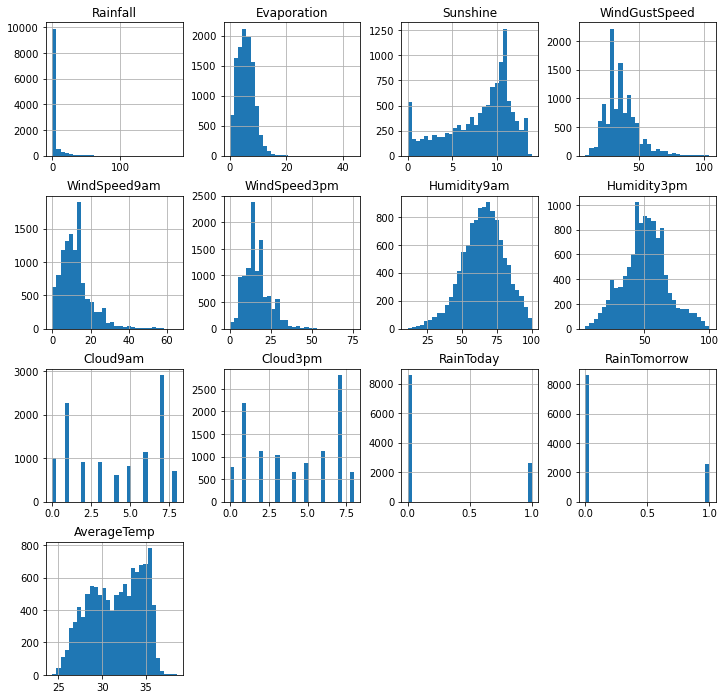

In [36]:
# plot histogram to the numerical variables
df[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

### Step 3: Insights for Exploratory Data Analysis

###### 3.1 Proportion of Rate of 'RainTomorrow'

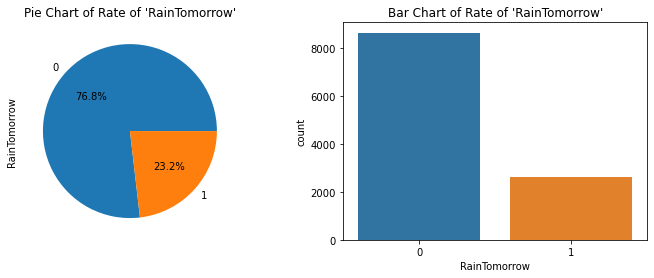

In [37]:
# define figure size
plt.figure(figsize=(12, 4))

# pie chart
plt.subplot(1, 2, 1)
df['RainTomorrow'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Pie Chart of Rate of 'RainTomorrow'")

# bar chart
plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', data=df)
plt.title("Bar Chart of Rate of 'RainTomorrow'")

plt.show()

3.1. Out of the 11226 cleaned records, 23.2% of them had rained the next day ('RainTomorrow').

###### 3.2 Rate of 'RainTomorrow' In Terms of 'Location'

<AxesSubplot:xlabel='Location', ylabel='count'>

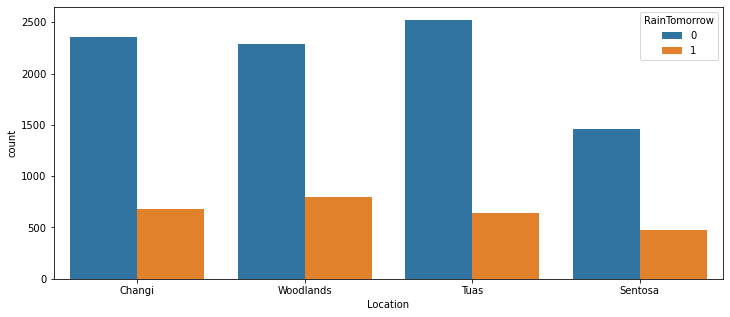

In [38]:
# bar chart 
plt.figure(figsize=(12, 5))
sns.countplot(x='Location', hue='RainTomorrow', data=df)

In [39]:
# mean value of various variables
df.groupby(['Location']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
Location,,,,,,,,,,,,,
Changi,2.900033,5.398684,8.079862,28.154656,6.948009,10.997697,64.011517,53.798947,3.893715,3.870352,0.221125,0.223758,31.451728
Sentosa,1.907946,4.497936,6.323426,44.900929,18.542312,21.438596,67.700206,51.596491,5.296698,5.294118,0.271414,0.246646,28.812229
Tuas,1.917294,5.597850,8.780462,34.881126,10.696807,14.520076,62.686058,46.914006,3.382548,3.466013,0.203288,0.202656,30.244199
Woodlands,4.065392,6.311277,8.580266,40.437135,15.019443,20.831821,68.196047,51.443616,4.288075,4.271549,0.259235,0.259559,34.697051


3.2. The rate of 'RainTomorrow' among the various 'Location' were similar, ranging from 20.3% to 25.6%.

###### 3.3 Rate of 'RainTomorrow' In Terms of 'Rainfall'

<AxesSubplot:xlabel='Count', ylabel='Rainfall'>

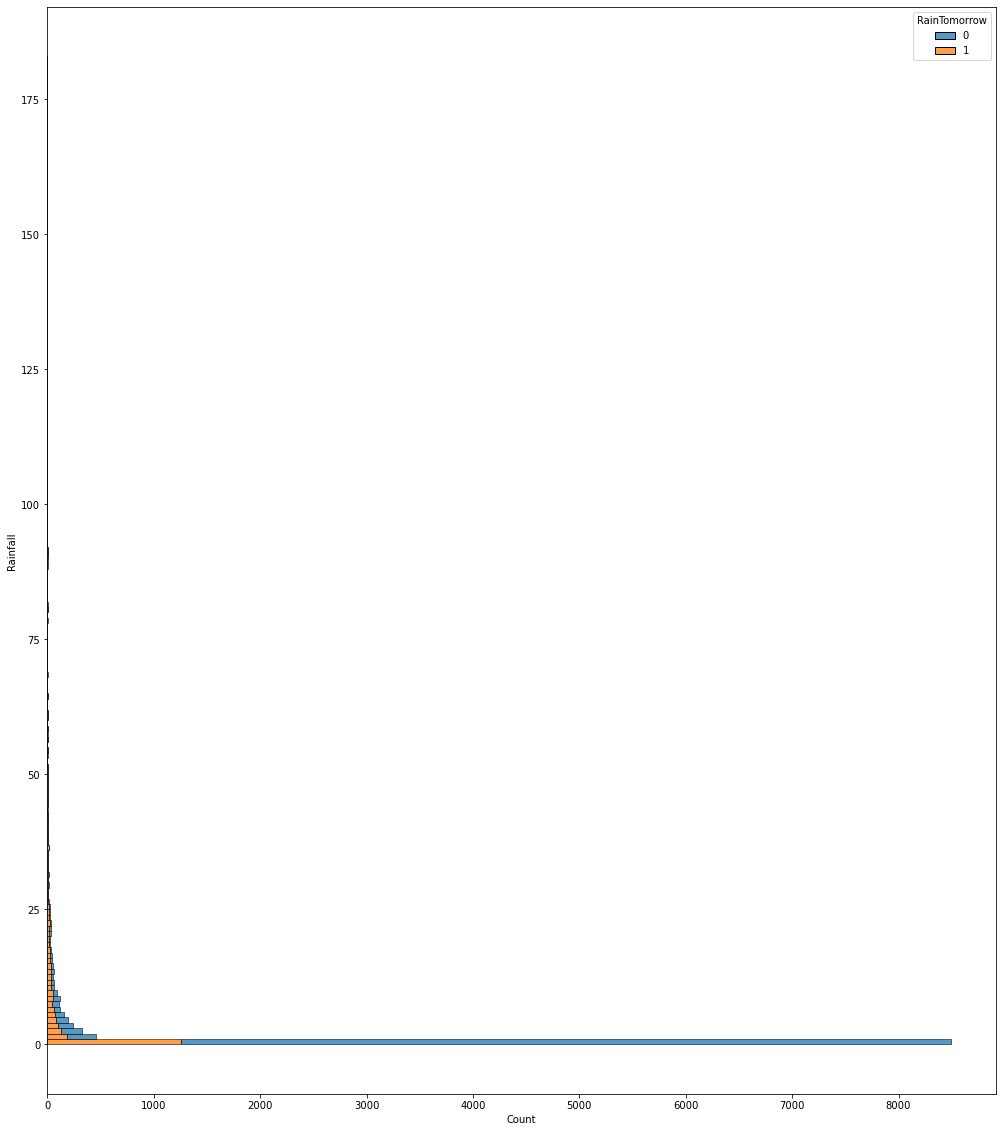

In [40]:
# histogram
plt.figure(figsize=(17, 20))
sns.histplot(data=df, y='Rainfall', hue='RainTomorrow', stat='count', binwidth=1, multiple='stack')

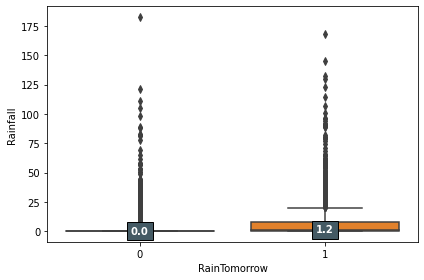

In [41]:
# box plot
box_plot = sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

3.3. a) Most of the days had 'Rainfall' of between 0.0mm to 1.0mm.<br>
b) Days that had rained the next day ('RainTomorrow') had a higher 'Rainfall' median of 1.2.<br>
c) There are many outliers present in 'Rainfall'. They have to be treated to have a better ML model performance. 


###### 3.4 Rate of 'RainTomorrow' In Terms of 'Evaporation'

<AxesSubplot:xlabel='Count', ylabel='Evaporation'>

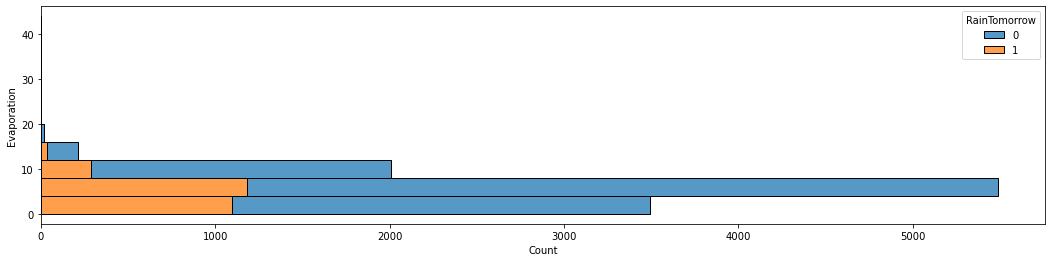

In [42]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='Evaporation', hue='RainTomorrow', stat='count', binwidth=4, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

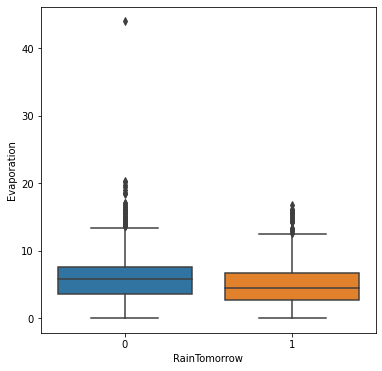

In [43]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='Evaporation')

3.4. a) Most of the days had 'Evaporation' of 4mm to 8mm; followed by 0mm to 4mm; and 8mm to 12mm.<br> 
b) Days that had rained the next day ('RainTomorrow') had a lower 'Evaporation' median.<br>
c) There is presence of an extreme outlier. 

###### 3.5 Rate of 'RainTomorrow' In Terms of 'Sunshine'

<AxesSubplot:xlabel='Count', ylabel='Sunshine'>

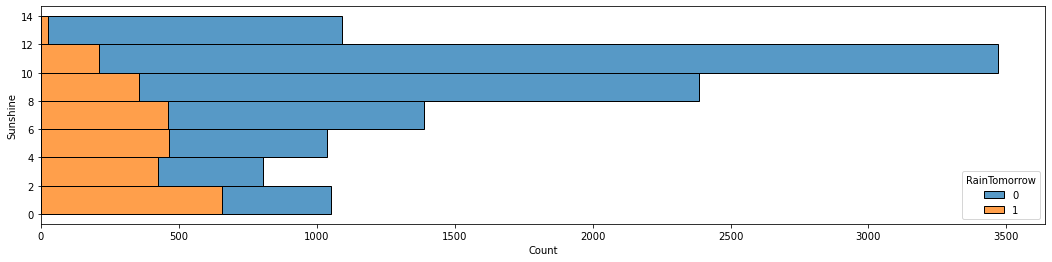

In [44]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='Sunshine', hue='RainTomorrow', stat='count', binwidth=2, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

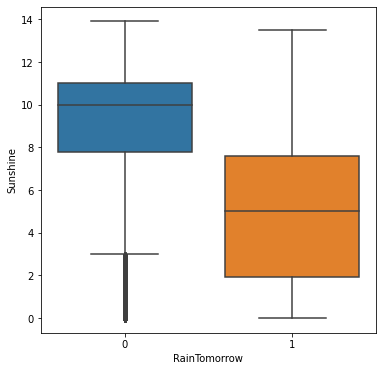

In [45]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='Sunshine')

3.5. a) Most of the days had 'Sunshine' of 6 hours to 12 hours.<br>
b) Days with 'Sunshine' of fewer than 2 hours had the highest proportion of rain the next day ('RainTomorrow').<br>
c) Days that had rained the next day ('RainTomorrow') had a significantly lower 'Sunshine' median.

###### 3.6 Rate of 'RainTomorrow' In Terms of 'WindGustDir'

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

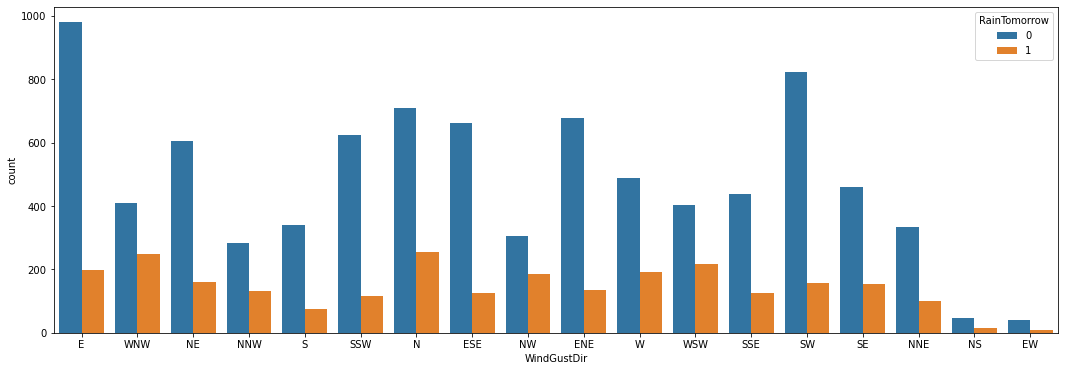

In [46]:
# bar chart 
plt.figure(figsize=(18, 6))
sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df)

In [47]:
# mean value of various variables
df.groupby(['WindGustDir']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
WindGustDir,,,,,,,,,,,,,
E,2.289228,6.286260,8.985920,35.178117,12.245123,15.372349,62.766751,46.836302,3.860051,3.689567,0.169635,0.168787,32.902375
ENE,1.659287,6.154367,9.097048,30.714637,9.612546,13.469865,63.526445,49.327183,3.685117,3.521525,0.168512,0.167282,32.476138
ESE,1.854707,6.442112,8.866412,37.810433,13.945293,16.095420,59.442748,43.375318,3.666667,3.762087,0.161578,0.159033,32.830280
EW,2.638298,5.485106,8.363830,34.872340,10.404255,16.021277,65.957447,53.851064,3.787234,4.446809,0.276596,0.170213,32.061702
N,1.620353,5.209450,7.143094,45.689512,19.176532,22.230530,66.453790,50.529595,4.533749,4.859813,0.174455,0.264798,30.947664
NE,2.271298,5.749017,8.849803,30.221494,9.200524,12.395806,62.495413,49.709043,3.369594,3.562254,0.146789,0.208388,31.816645
NNE,1.293764,4.987991,8.115704,34.000000,11.205543,15.711316,66.392610,49.644342,3.803695,3.815242,0.133949,0.230947,31.386836
NNW,2.701449,5.050242,7.617633,36.147343,12.055556,17.975845,70.560386,53.746377,4.282609,4.606280,0.239130,0.318841,32.318116
NS,3.680645,6.138710,7.833871,36.516129,12.967742,16.983871,64.629032,51.048387,4.532258,4.241935,0.258065,0.225806,31.572581


3.6. a) 'WindGustDir' of WNW, NW and WSW had the highest rate of 'RainTomorrow' at 37.73%, 37.70% and 34.9% respectively.<br> 
b) 'WindGustDir' of SSW, ESE and SW had the lowest rate of 'RainTomorrow' at 15.8%, 15.9% and 16.0% respectively. 

###### 3.7 Rate of 'RainTomorrow' In Terms of 'WindGustSpeed'

<AxesSubplot:xlabel='Count', ylabel='WindGustSpeed'>

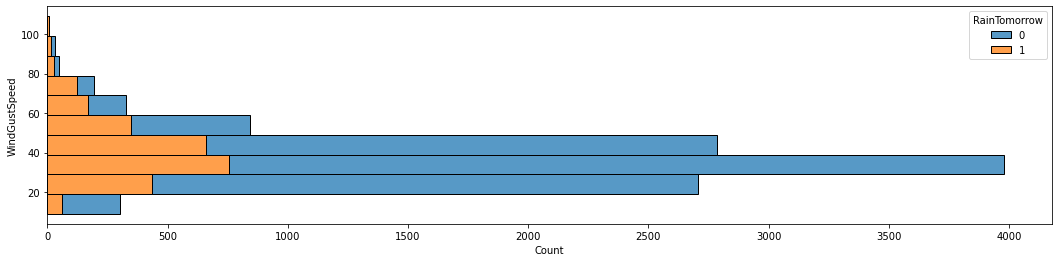

In [48]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='WindGustSpeed', hue='RainTomorrow', stat='count', binwidth=10, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustSpeed'>

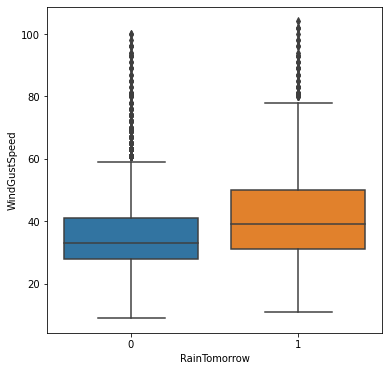

In [49]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='WindGustSpeed')

3.7. a) Most of the days had 'WindGustSpeed' of 20km/h to 50km/h.<br>
b) Days with 'WindGustSpeed' of more than 60km/h had higher proportion of rain the next day ('RainTomorrow').<br>
c) Days that had rained the next day ('RainTomorrow') had a higher 'WindGustSpeed' median.

###### 3.8 Rate of 'RainTomorrow' In Terms of 'WindDir9am'

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

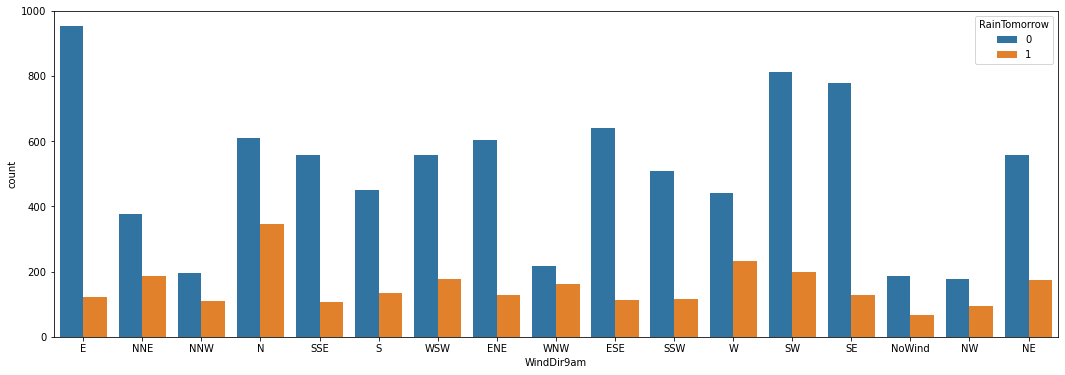

In [50]:
# bar chart 
plt.figure(figsize=(18, 6))
sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df)

In [51]:
# mean value of various variables
df.groupby(['WindDir9am']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
WindDir9am,,,,,,,,,,,,,
E,1.804089,6.633178,9.641264,36.173792,13.357807,16.419145,61.285316,43.246283,3.098513,3.220260,0.112454,0.114312,32.765335
ENE,1.935880,6.255252,9.222647,33.667121,11.556617,15.036835,61.885402,45.167804,3.289222,3.425648,0.140518,0.175989,32.495225
ESE,2.367109,6.541114,9.100398,36.844828,13.238727,16.828912,60.970822,46.001326,3.798408,3.663130,0.183024,0.149867,32.842042
N,1.664301,4.951148,6.533716,47.545929,20.398747,22.112735,65.965553,52.368476,4.772443,5.263048,0.223382,0.362213,30.209708
NE,1.571272,5.470451,8.611354,32.663475,10.867305,14.326949,63.547196,46.915185,3.522572,3.709986,0.160055,0.236662,31.548016
NNE,2.017345,4.878230,7.678053,34.300885,10.012389,15.467257,68.934513,53.686726,4.100885,4.348673,0.191150,0.332743,31.022124
NNW,3.167974,5.537908,7.201634,40.434641,12.454248,18.049020,67.911765,57.934641,4.803922,4.977124,0.339869,0.356209,31.931373
NW,4.344118,5.627206,7.466176,39.330882,11.742647,18.125000,67.172794,58.805147,4.886029,4.783088,0.327206,0.349265,31.751103
NoWind,3.445238,3.393254,6.401984,28.222222,0.000000,11.404762,79.468254,57.730159,4.678571,4.480159,0.353175,0.261905,29.753968


3.8. a) 'WindDir9am' of WNW, N and NNW had the highest rate of 'RainTomorrow' at 43.0%, 36.2% and 35.6% respectively.<br> 
b) 'WindDir9am' of E, SE and ESE had the lowest rate of 'RainTomorrow' at 11.4%, 14.2% and 15.0% respectively. 

###### 3.9 Rate of 'RainTomorrow' In Terms of 'WindDir3pm'

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

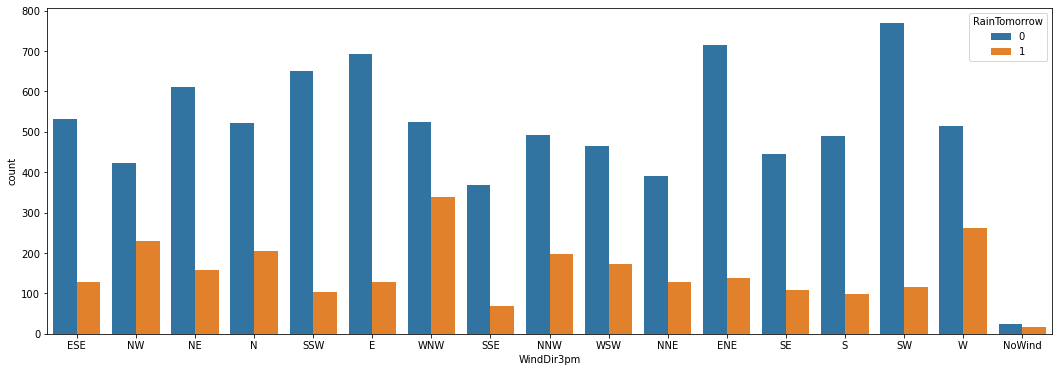

In [52]:
# bar chart 
plt.figure(figsize=(18, 6))
sns.countplot(x='WindDir3pm', hue='RainTomorrow', data=df)

In [53]:
# mean value of various variables
df.groupby(['WindDir3pm']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
WindDir3pm,,,,,,,,,,,,,
E,1.988049,6.050366,8.616463,34.204878,12.200000,14.898780,62.257317,47.068293,3.935366,3.919512,0.169512,0.156098,32.437805
ENE,2.207746,5.893897,8.816080,30.627934,9.856808,13.134977,62.469484,49.180751,3.782864,3.525822,0.185446,0.161972,32.207746
ESE,2.011212,6.197424,8.243788,34.927273,11.846970,14.224242,61.486364,47.059091,4.062121,4.077273,0.181818,0.192424,32.015303
N,1.653370,5.149931,7.336864,46.250344,18.614856,24.066025,66.836314,49.231087,4.314993,4.624484,0.178817,0.283356,31.308941
NE,2.244733,5.618726,8.841482,29.566970,8.399220,12.123537,64.543563,52.431730,3.621586,3.587776,0.149545,0.206762,31.998440
NNE,1.861776,5.540927,8.654633,35.194981,11.714286,15.646718,64.667954,50.295367,3.604247,3.805019,0.158301,0.245174,32.005985
NNW,2.347033,5.668452,8.282055,39.081042,13.487699,19.675832,68.927641,52.545586,4.053546,4.244573,0.192475,0.286541,33.039508
NW,3.567841,5.438438,7.943492,39.042879,12.856049,19.075038,69.411945,53.817764,4.306279,4.428790,0.266462,0.352221,32.684686
NoWind,5.609756,3.034146,3.068293,21.170732,5.048780,0.000000,84.560976,69.048780,5.902439,6.609756,0.439024,0.414634,29.441463


3.9. a) 'WindDir3pm' of NoWind, WNW and NW had the highest rate of 'RainTomorrow' at 41.5%, 39.3% and 35.2% respectively.<br> 
b) 'WindDir3pm' of SW, SSW and E had the lowest rate of 'RainTomorrow' at 13.0%, 13.7% and 15.6% respectively. 

###### 3.10 Rate of 'RainTomorrow' In Terms of ' WindSpeed9am'

<AxesSubplot:xlabel='Count', ylabel='WindSpeed9am'>

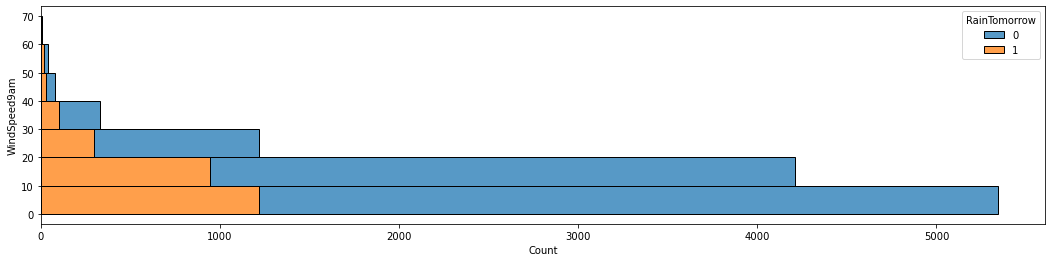

In [54]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='WindSpeed9am', hue='RainTomorrow', stat='count', binwidth=10, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed9am'>

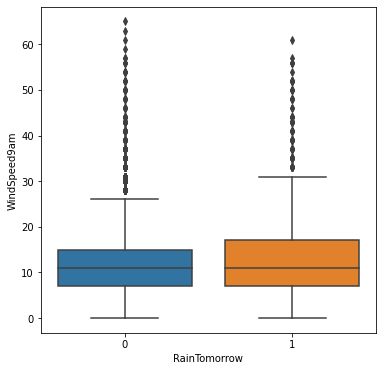

In [55]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='WindSpeed9am')

3.10. a) Most of the days had 'WindSpeed9am' of 0km/h to 20km/h.<br>
b) Days that had rained the next day ('RainTomorrow') had similar 'WindSpeed9am' median as days that had not rained the next day. 

###### 3.11 Rate of 'RainTomorrow' In Terms of 'WindSpeed3pm'

<AxesSubplot:xlabel='Count', ylabel='WindSpeed3pm'>

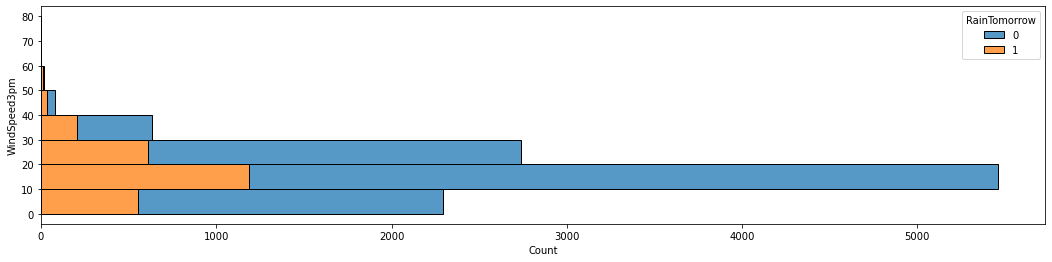

In [56]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='WindSpeed3pm', hue='RainTomorrow', stat='count', binwidth=10, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

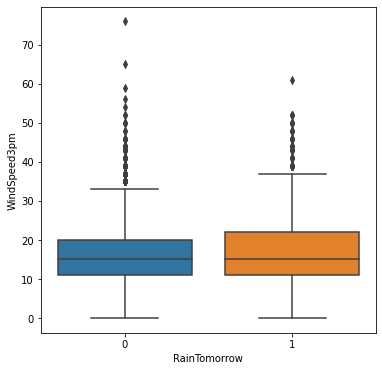

In [57]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='WindSpeed3pm')

3.11. a) Most of the days had 'WindSpeed3pm' of 0km/h to 30km/h.<br>
b) Days that had rained the next day ('RainTomorrow') had similar 'WindSpeed3pm' median as days that had not rained the next day. 

###### 3.12 Rate of 'RainTomorrow' In Terms of 'Humidity9am'

<AxesSubplot:xlabel='Count', ylabel='Humidity9am'>

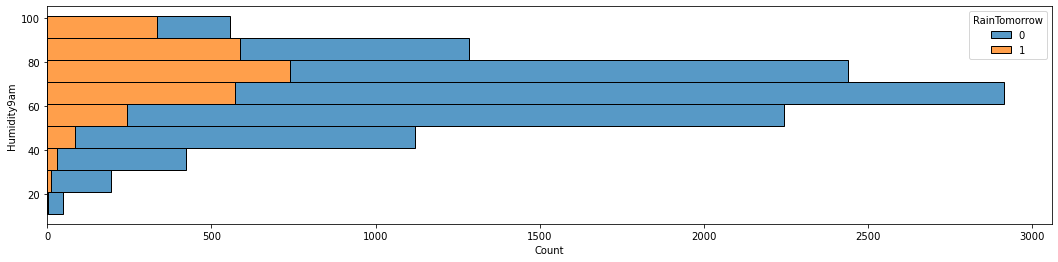

In [58]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='Humidity9am', hue='RainTomorrow', stat='count', binwidth=10, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

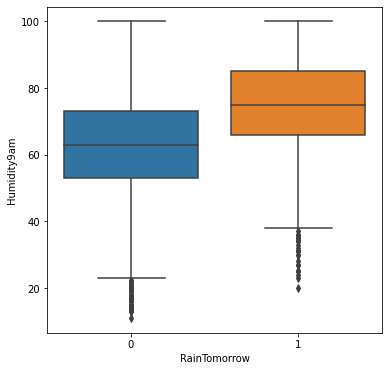

In [59]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='Humidity9am')

3.12. a) Most of the days had 'Humidity9am' of 40% to 90%.<br>
b) Days with 'Humidity9am' of more than 90% had higher proportion of rain the next day ('RainTomorrow').<br>
c) Days that had rained the next day ('RainTomorrow') had a higher 'Humidity9am' median.

###### 3.13 Rate of 'RainTomorrow' In Terms of 'Humidity3pm'

<AxesSubplot:xlabel='Count', ylabel='Humidity3pm'>

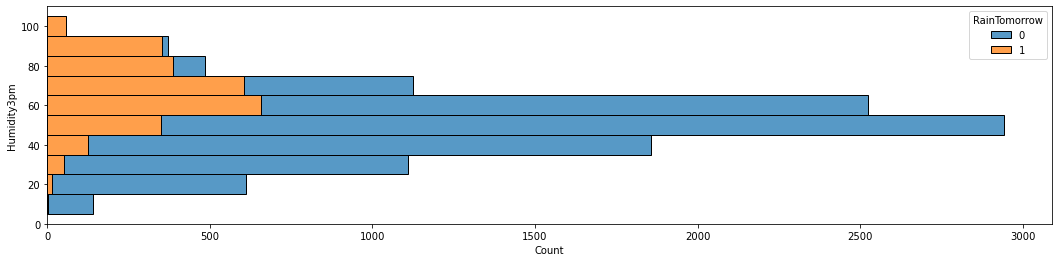

In [60]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='Humidity3pm', hue='RainTomorrow', stat='count', binwidth=10, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

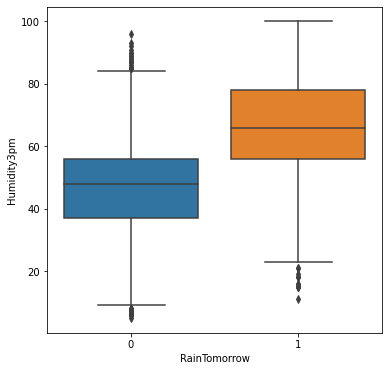

In [61]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='Humidity3pm')

3.13. a) Most of the days had 'Humidity3pm' of 30% to 80%.<br>
b) Days with 'Humidity3pm' of more than 70% had higher proportion of rain the next day ('RainTomorrow').<br>
c) Days that had rained the next day ('RainTomorrow') had a higher 'Humidity3pm' median.

###### 3.14 Rate of 'RainTomorrow' In Terms of 'Pressure9am'

<AxesSubplot:xlabel='Pressure9am', ylabel='count'>

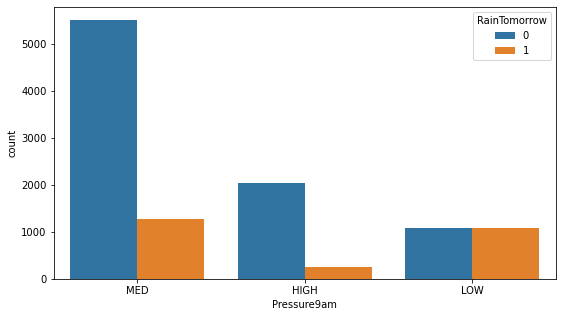

In [62]:
# bar chart 
plt.figure(figsize=(9, 5))
sns.countplot(x='Pressure9am', hue='RainTomorrow', data=df)

In [63]:
# mean value of various variables
df.groupby(['Pressure9am']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
Pressure9am,,,,,,,,,,,,,
HIGH,1.044880,3.643094,7.781656,29.651852,9.463617,12.660566,68.155991,49.127233,3.568192,3.707190,0.158170,0.109804,28.726841
LOW,7.348041,6.113619,6.656576,44.319963,15.038713,20.146922,70.390858,61.045709,5.531716,5.659515,0.465485,0.499534,33.240485
MED,1.910830,6.017047,8.682805,36.043171,12.269338,16.639605,62.933107,48.180934,3.828054,3.760866,0.188596,0.188154,31.967246


3.14. a) 'Pressure9am' of LOW had the highest rate of 'RainTomorrow' at 49.9%.<br>
b) 'Pressure9am' of HIGH had the lowest rate of 'RainTomorrow' at 11.0%.

###### 3.15 Rate of 'RainTomorrow' In Terms of 'Pressure3pm'

<AxesSubplot:xlabel='Pressure3pm', ylabel='count'>

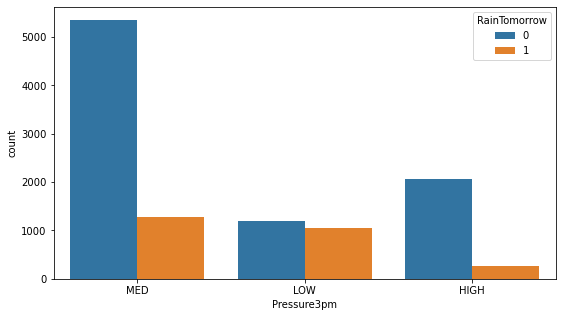

In [64]:
# bar chart 
plt.figure(figsize=(9, 5))
sns.countplot(x='Pressure3pm', hue='RainTomorrow', data=df)

In [65]:
# mean value of various variables
df.groupby(['Pressure3pm']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
Pressure3pm,,,,,,,,,,,,,
HIGH,1.368263,3.614371,7.521600,30.536356,9.910607,13.189050,68.757485,50.274594,3.810522,3.949957,0.202310,0.116766,28.636655
LOW,6.626601,6.157206,7.103203,43.040480,14.399911,20.068950,70.321619,59.208185,5.263345,5.372776,0.418149,0.463523,33.757251
MED,1.961657,6.026265,8.660738,36.076657,12.303012,16.450753,62.594127,48.191416,3.808584,3.743072,0.184940,0.193524,31.825090


3.15. a) 'Pressure3pm' of LOW had the highest rate of 'RainTomorrow' at 46.4%.<br>
b) 'Pressure3pm' of HIGH had the lowest rate of 'RainTomorrow' at 11.7%.

###### 3.16 Rate of 'RainTomorrow' In Terms of 'Cloud9am'

<AxesSubplot:xlabel='Cloud9am', ylabel='count'>

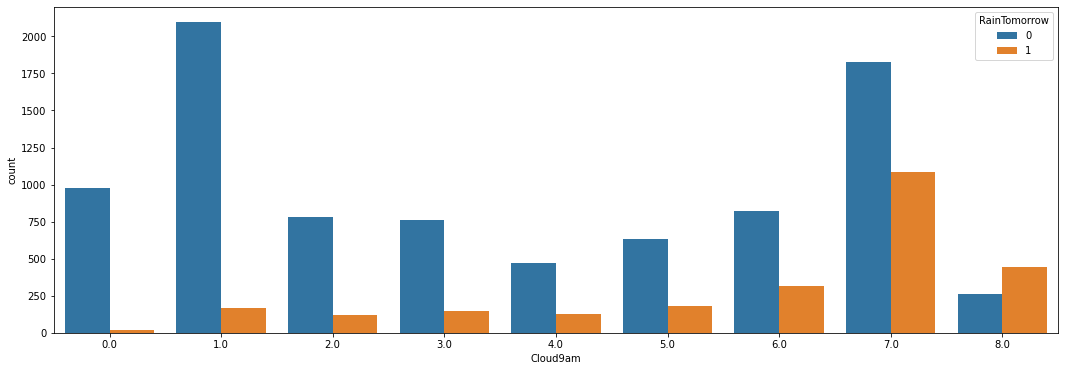

In [66]:
# bar chart 
plt.figure(figsize=(18, 6))
sns.countplot(x='Cloud9am', hue='RainTomorrow', data=df)

In [67]:
# mean value of various variables
df.groupby(['Cloud9am']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud3pm,RainToday,RainTomorrow,AverageTemp
Cloud9am,,,,,,,,,,,,
0.0,0.082800,6.719600,11.197200,33.883000,11.456000,14.695000,52.028000,33.802000,0.877000,0.017000,0.020000,31.191700
1.0,0.779319,5.763190,10.464560,33.939019,11.250994,15.402563,59.880247,42.358374,2.218736,0.086611,0.073796,31.250243
2.0,0.975139,5.900999,9.980022,35.059933,11.829079,16.791343,61.726970,47.374029,3.266371,0.129856,0.130966,32.098335
3.0,1.543300,5.745626,9.680066,36.183832,12.230343,17.236988,62.890365,49.161683,3.725360,0.166113,0.160576,31.982281
4.0,2.176412,5.853821,9.352326,37.182724,12.134551,17.818937,64.765781,51.468439,3.910299,0.230897,0.215947,32.238040
5.0,2.315451,5.663412,8.551916,36.535229,12.658838,17.234858,65.673671,51.955501,4.634116,0.247219,0.220025,31.824475
6.0,2.882042,5.348856,7.813204,37.551937,12.749120,17.303697,67.536092,53.370599,4.970070,0.299296,0.278169,31.791373
7.0,4.016501,4.980646,5.318151,38.485734,13.194225,17.279134,71.443451,58.622551,5.980749,0.366105,0.371949,31.403369
8.0,12.604552,4.791892,2.210953,37.258890,11.669986,14.718350,82.291607,70.724040,6.849218,0.593172,0.631579,31.045661


3.16. a) 'Cloud9am' of 8 oktas had the highest rate of 'RainTomorrow' at 63.2%.<br>
b) 'Cloud9am' of 0 okta had the lowest rate of 'RainTomorrow' at 2.0%.

###### 3.17 Rate of 'RainTomorrow' In Terms of 'Cloud3pm'

<AxesSubplot:xlabel='Cloud3pm', ylabel='count'>

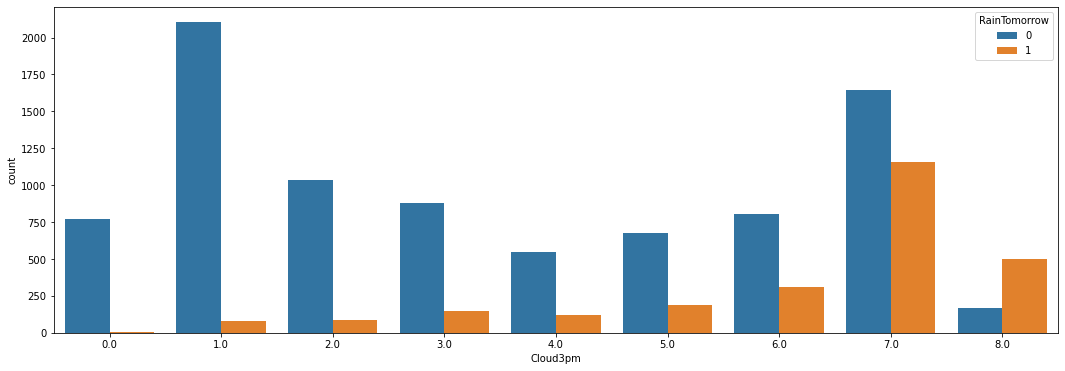

In [68]:
# bar chart 
plt.figure(figsize=(18, 6))
sns.countplot(x='Cloud3pm', hue='RainTomorrow', data=df)

In [69]:
# mean value of various variables
df.groupby(['Cloud3pm']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,RainToday,RainTomorrow,AverageTemp
Cloud3pm,,,,,,,,,,,,
0.0,0.114543,7.159588,11.389447,35.449163,12.615187,15.401544,50.077220,31.611326,0.718147,0.018018,0.007722,31.287387
1.0,0.611732,6.267369,10.803071,33.549496,10.977544,15.751604,59.269936,41.664986,1.997250,0.060037,0.035747,31.725665
2.0,1.422500,5.970089,10.234643,34.080357,10.967857,16.514286,62.907143,46.420536,2.995536,0.153571,0.078571,32.157768
3.0,1.694645,5.400584,9.590458,34.634859,11.174294,16.158715,65.322298,47.991237,3.614411,0.196689,0.147030,31.694645
4.0,2.390390,5.348949,8.969369,36.270270,11.432432,16.710210,66.484985,50.198198,4.162162,0.252252,0.183183,31.573724
5.0,2.662253,5.246341,8.341115,36.373984,12.197445,16.914053,67.343786,50.645761,4.610918,0.264808,0.214866,31.418002
6.0,3.298662,5.079839,7.384478,38.299732,13.137377,17.876004,68.591436,53.610169,5.066012,0.319358,0.279215,31.384478
7.0,4.186320,4.907659,5.207125,38.887424,13.810830,17.267902,70.628785,59.195226,6.014250,0.364090,0.413253,31.297649
8.0,10.572331,4.940000,1.920301,38.562406,12.193985,14.366917,77.106767,76.066165,7.133835,0.520301,0.747368,31.490376


3.17. a) 'Cloud3pm' of 8 oktas had the highest rate of 'RainTomorrow' at 74.7%.<br>
b) 'Cloud3pm' of 0 okta had the lowest rate of 'RainTomorrow' at 0.8%.

###### 3.18 Rate of 'RainTomorrow' In Terms of 'RainToday'

<AxesSubplot:xlabel='RainToday', ylabel='count'>

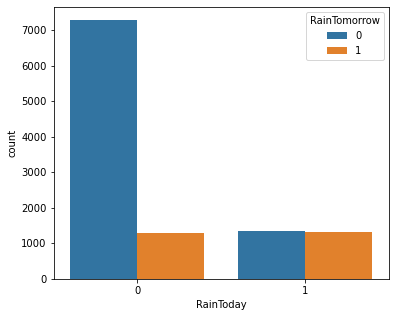

In [70]:
# bar chart 
plt.figure(figsize=(6, 5))
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)

In [71]:
# mean value of various variables
df.groupby(['RainToday']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainTomorrow,AverageTemp
RainToday,,,,,,,,,,,,
0,0.057426,5.927874,8.856610,35.323821,12.135119,16.340012,61.80000,47.090274,3.583343,3.634712,0.150728,31.638847
1,11.597122,4.322378,5.689814,39.546763,12.515714,17.003029,77.20939,62.992427,5.780765,5.665657,0.494510,31.252518


3.18. Days that rained today had a higher rate of raining the next day ('RainTomorrow') at 49.5%.

###### 3.19 Rate of 'RainTomorrow' In Terms of 'ColourOfBoats'

<AxesSubplot:xlabel='ColourOfBoats', ylabel='count'>

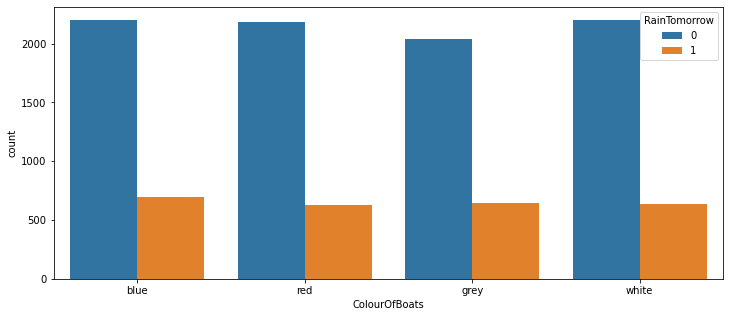

In [72]:
# bar chart 
plt.figure(figsize=(12, 5))
sns.countplot(x='ColourOfBoats', hue='RainTomorrow', data=df)

In [73]:
# mean value of various variables
df.groupby(['ColourOfBoats']).mean()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp
ColourOfBoats,,,,,,,,,,,,,
blue,2.869016,5.601969,8.125078,36.398618,12.134715,16.438342,65.448705,50.940587,4.091537,4.112263,0.245596,0.239724,31.570846
grey,2.928891,5.515004,8.045756,36.592331,12.523455,16.816456,65.635517,51.020477,4.132539,4.152271,0.234550,0.240879,31.561690
red,2.803630,5.475267,8.079537,36.113167,12.095374,16.323488,65.385765,50.840569,4.080783,4.107473,0.228470,0.222776,31.469181
white,2.493827,5.604832,8.191993,36.176014,12.161552,16.422222,65.240917,50.531570,4.098060,4.080071,0.232099,0.223280,31.589665


3.19. The rate of 'RainTomorrow' among the various 'ColourOfBoats' were similar, ranging from 22.2% to 24.1%.

###### 3.20 Rate of 'RainTomorrow' In Terms of 'AverageTemp'

<AxesSubplot:xlabel='Count', ylabel='AverageTemp'>

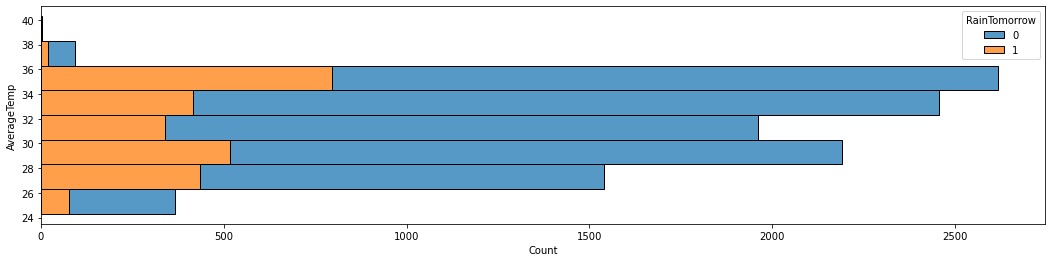

In [74]:
# histogram
plt.figure(figsize=(18, 4))
sns.histplot(data=df, y='AverageTemp', hue='RainTomorrow', stat='count', binwidth=2, multiple='stack')

<AxesSubplot:xlabel='RainTomorrow', ylabel='AverageTemp'>

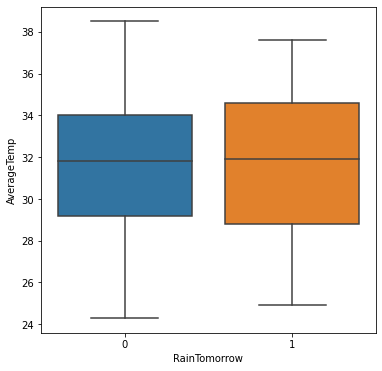

In [75]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='RainTomorrow', y='AverageTemp')

3.20. a) Most of the days had 'AverageTemp' of 26degC to 36degC.<br>
b) Days that had rained the next day ('RainTomorrow') had similar 'AverageTemp' median as days that had not rained the next day. 

###### 3.21 Correlation Matrix

<AxesSubplot:>

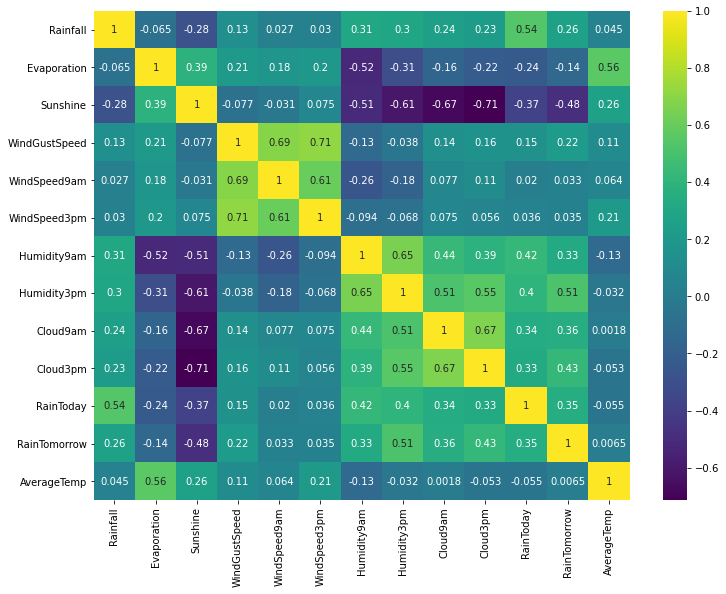

In [76]:
# correlation matrix
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2g')

3.21. With respect to 'RainTomorrow', the highest correlated variables are:<br>
1. 'Humidity3pm' (0.51)
2. 'Sunshine' (-0.48)
3. 'Cloud3pm' (0.43)
4. 'Cloud9am' (0.36)
5. 'Cloud3pm' (0.35)